# Instant Email Reply Using GPT3
## Soft Skills for Applied Computer Scientists Project (Vrije Universiteit Brussel)

```
Course Instructors: 
+ Nikos Deligiannis
+ Tanmoy Mukherjee
+ Giannis Bekoulis

Student Group:
+ Esteban Velásquez Rendón
+ Viktor Stavrinopoulos
+ Dávid Juraj Szücs
+ Sincy Raj

MSc. Applied Computer Science 2021-2022
```

## Introduction:

Email is one of the most favored modes of communication on the internet despite the increase in social networking platforms. With the increase in growth of Email Communication, it is necessary to organize the information for faster and easier processing. Usually, the companies receive huge number of emails to the single email address, and it is often the case where responding to this huge traffic of emails without a long delay is essential. To meet this challenge, we came up with a coherent solution for email semi-automatic reply system to increase email productivity, to reduce the average email handling time in companies and thus to improve the customer service and make the company operations effortless and reliable. The proposed solution is based on Natural Language Processing (NLP) techniques like Natural Language Understanding (NLU), which is a subtopic of natural-language processing in artificial intelligence that deals with machine reading comprehension, and Natural Language Generation (NLG).

The following Jupyter Notebook provides an implementation done in python that makes use of GPT3 to extract the email information from outlook, interpret the message extracting the main keywords and finally providing a suggested response for the user to that email.  The application pipeline looks as follows:

![Pipeline](images/Instant-Email-Reply.png "Pipeline")

The main steps are then the following:

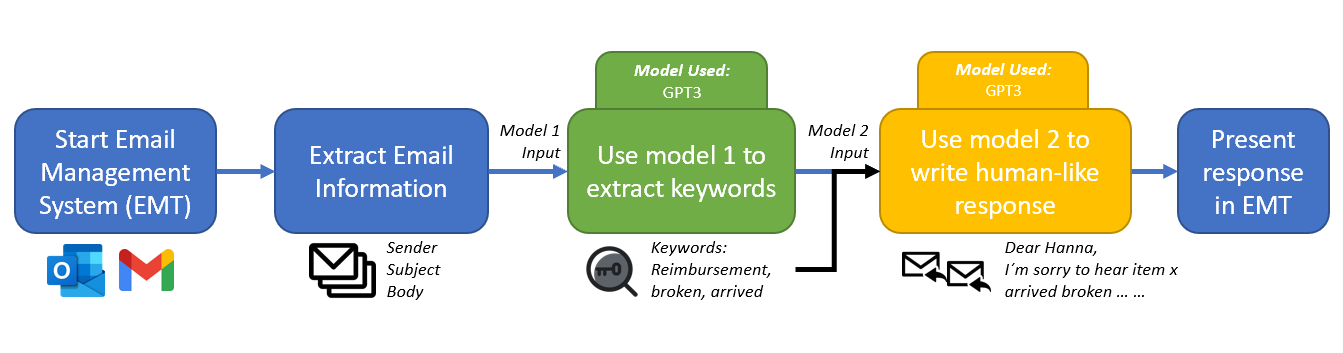

# TASK 1: Start Email Managing Tool (EMT)

For the purpose of this demonstration we will use Outlook as the email managing tool. In this sense, we use the following code to open it:

In [ ]:
# Open Outlook
import os
try:
    os.startfile("outlook")
except:
    print("Outlook didn't open successfully")

# TASK 2: Extract Email Information

We are interested on extracting the email information such as: sender, subject and body of the message. To do so, we execute the following code:

### Accessing Emails (Outlook)

For the purpose of this demonstration we will grab the last received email from the INBOX of the Outlook Client. You can adjust to another email if wanted ( you only require to change the index of messages[index] )

In [ ]:
# Accessing last email in Outlook
import win32com.client

outlook = win32com.client.Dispatch("Outlook.Application")
ns = outlook.GetNamespace("MAPI")

inbox = ns.GetDefaultFolder(6) #Inbox folder = 6
# Interesting note! we can also access folder 5, which is sent emails,
# to give the examples to the GPT3 model for each specific employee! 
# So that it actually sounds like the employee! :)

messages = inbox.Items

messages.Sort("[ReceivedTime]", True)

message = messages[0] # ------------------------------->>>> CHANGE THIS NUMBER TO ACCESS ANOTHER EMAIL IF WANTED (0 IS THE LAST ONE)
subject_content = message.subject
body_content = message.body
sender_name = message.SenderName
sender_email = message.SenderEmailAddress
#recipients = message.Recipients

print("~~~~~~~~~~~~~~~~~~Sender~~~~~~~~~~~~~~~~~~~")
print(" Sender Name: ", sender_name)
print(" Sender Email: ", sender_email)
print("~~~~~~~~~~~~~~~~~Subject~~~~~~~~~~~~~~~~~~~\n", subject_content)
print("~~~~~~~~~~~~~~~~~~Body~~~~~~~~~~~~~~~~~~~~~\n", body_content)

~~~~~~~~~~~~~~~~~~Sender~~~~~~~~~~~~~~~~~~~
 Sender Name:  Esteban Velásquez Rendón
 Sender Email:  estebanvelaren@gmail.com
~~~~~~~~~~~~~~~~~Subject~~~~~~~~~~~~~~~~~~~
 Reimbursement: Received a broken TV product
~~~~~~~~~~~~~~~~~~Body~~~~~~~~~~~~~~~~~~~~~
 Hello, I just wanted to let you know that once I opened the TV package I noticed the product arrived broken. In this sense, I would appreciate a full refund.  

Looking forward to your response,
Esteban

-- 

 <https://upload.wikimedia.org/wikipedia/commons/6/65/VUB_RGB.png> 


Esteban Velásquez Rendón
Student / MSc. Applied Computer Science
+33 06 65 91 09 40



# TASK 3: Use model 1 to extract keywords:

As previously mentioned, for this implementation example, we will make use of the power of GPT-3 for model 1 and 2. The first model will capture the keywords from the previously email extracted information.

To do so, we need to structure the prompt or the input we will send to GPT-3. Notice that we defined the input for the first model as the combination of two elements:

$PROMPT$ = $Instruction$ to GPT3 + $Parragraph$ with condensed information from the email.

### Generating the parragraph to be appended in the prompt: 

$Parragraph$ = Subject + Body

In [ ]:
# Parsing the body and structuring the input message = subject + body
body_nosignature = body_content.split("--")[0] # Exclude signature
body_final = body_nosignature.replace('\r\n','') # Condense in 1 parragraph
input_message = subject_content + ". " + body_final
print(input_message)

Reimbursement: Received a broken TV product. Hello, I just wanted to let you know that once I opened the TV package I noticed the product arrived broken. In this sense, I would appreciate a full refund.  Looking forward to your response,Esteban


### Merging Instruction and Parragraph in the PROMPT
$Instruction$ = "Find the main keywords of the following text and give the answer separated by commas: \""

$Parragraph$ = Reimbursement: Received a broken TV product. Hello, I just wanted to let you know that once I opened the TV package I noticed the product arrived broken. In this sense, I would appreciate a full refund.  Looking forward to your response,Esteban

$PROMPT$ = $Instruction$ + $Parragraph$


In [ ]:
# Creating the prompt for GPT3:
gpt3_prompt = "Find the main keywords of the following text and give the answer separated by commas: \"" + input_message + "\""
print(gpt3_prompt)

Find the main keywords of the following text and give the answer separated by commas: "Reimbursement: Received a broken TV product. Hello, I just wanted to let you know that once I opened the TV package I noticed the product arrived broken. In this sense, I would appreciate a full refund.  Looking forward to your response,Esteban"


### Installing OpenAI (to be able to use GPT3)

In [ ]:
!pip install openai

### Using Model 1: GPT-3 Keyword Extraction

For model 1 we will use GPT-3 engine called "davinci-instruct-beta-v3", which is a special engine that works really good with responding to $Instructions$, like the one we appended in our $PROMPT$. In this case I configured the model parameters as follows:

In [ ]:
import openai
openai.api_key = "" # Replace with your OPENAI API KEY

response = openai.Completion.create(
  engine="davinci-instruct-beta-v3",
  prompt= gpt3_prompt,
  temperature=0.7,
  max_tokens=20,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

### GPT 3 MODEL 1 OUTPUT!
These are the main keywords that GPT-3 found from the email we provided:

In [ ]:
print(response.choices[0].text)



Reimbursement, received, broken, TV, product, opened, noticed, arrived


# TASK 4: Use model 2 to create human-like responses

For this case we will input the previous GPT-3 Output as an input to the second model that will generate human-like response for the email by taking into account the keywords. For the second model we will use again GPT-3 with different parameters that work best for this case. But first we need to setup our new prompt:

$PROMPT2$ = $Instruction$ + $Keywords$

In [ ]:
keywords = response.choices[0].text
keywords = keywords.strip()
input_message2 = keywords
gpt3_prompt2 = "Write a response email taking into account the following keywords: " + keywords
print(gpt3_prompt2)

Write a response email taking into account the following keywords: Reimbursement, received, broken, TV, product, opened, noticed, arrived


### Using Model 2: GPT-3 Text Generation
In this case I configured the model parameters as follows:

In [ ]:
openai.api_key = "" # Replace with your OPENAI API KEY

response2 = openai.Completion.create(
  engine="davinci-instruct-beta-v3",
  prompt= gpt3_prompt2,
  temperature=0.7,
  max_tokens=100,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

### GPT 3 MODEL 2 OUTPUT!
This is the generated reply for the email that GPT-3 just created based on the keywords and the instruction we just provided:

In [ ]:
predicted_response = response2.choices[0].text
print(predicted_response)



Hello,

Thank you for reaching out to us about the reimbursement for the broken TV. We are sorry that it arrived in that condition and we appreciate you letting us know. We have processed the reimbursement and it has been sent to your account. Thank you for your patience and for being a valued customer.

Sincerely,
[Their Name]


# TASK 5: Present Response in Email Managing Tool
Now that we have our generated reply by GPT-3 all we have to do is to present to the user. In this case we will present it via Outlook. We will then structure the response in HTML form (as are the emails structured), display it nicely to the user and stored it in the Draft Folder of their email client. 

In [ ]:
reply = message.Reply()
new_format = predicted_response.replace("\n\n","",1)
new_format = new_format.replace("\n\n","\n")
array = new_format.split("\n")
new_html_body = ""
for line in array:
    new_html_body += """
    <div>
        <span style="font-family: 'Lucida Sans'; font-size: 12; color: #000000;">
            {}
        </span>
    </div><br>
    """.format(line)
reply.HTMLBody = new_html_body + reply.HTMLBody
reply.Display()
reply.Save() # To save in draft emails! :)

# Result:

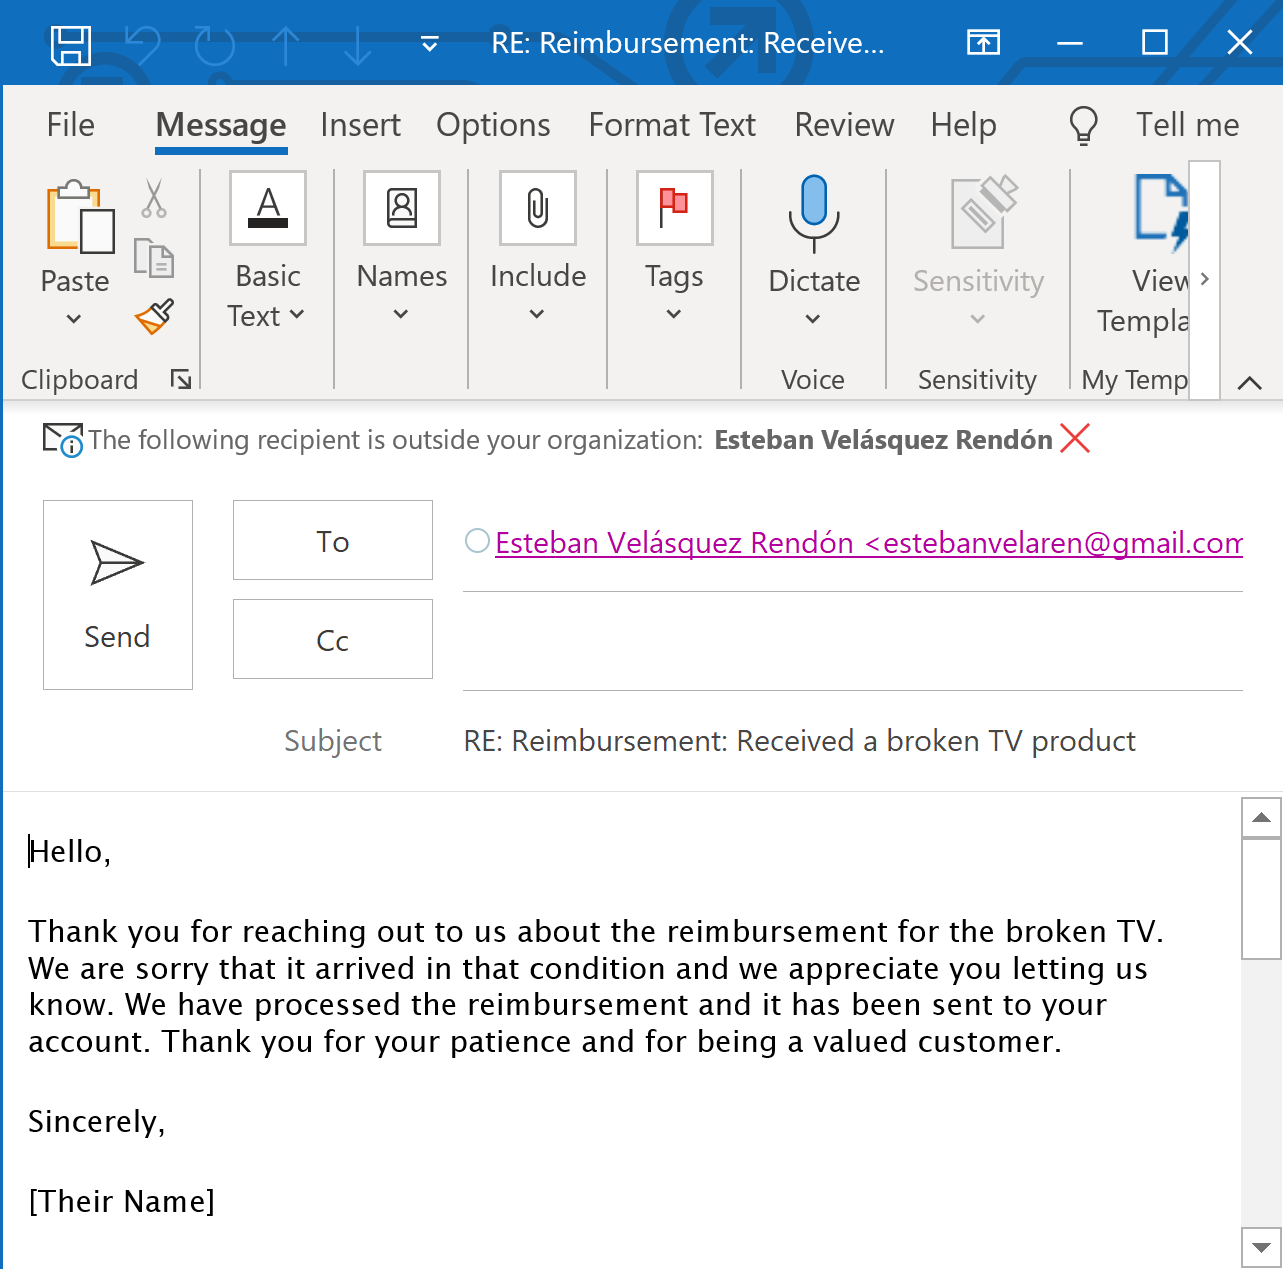

It is also stored in Draft Folder of Outlook automatically:

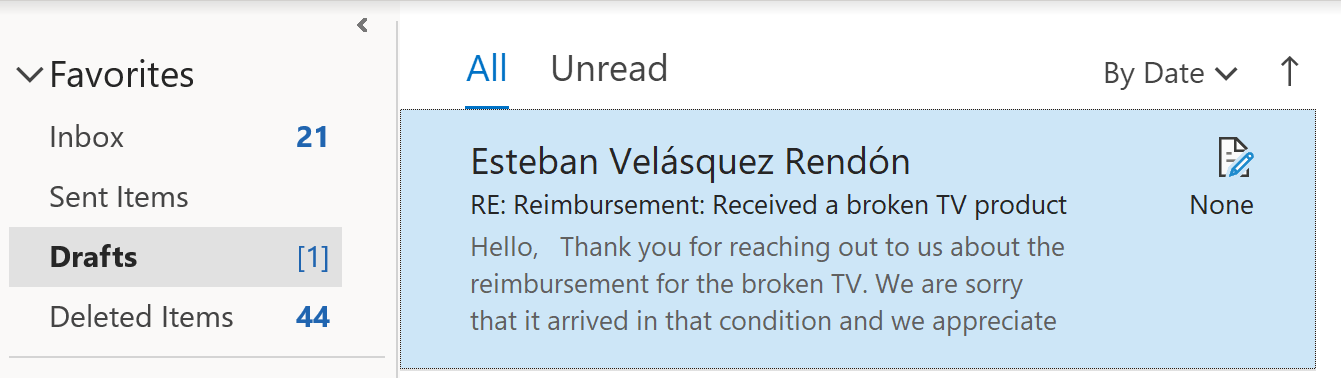